# Quantum Fourier Transform Benchmark

In [1]:
low = 1
high = 27
samples = 10

In [2]:
import time
import random
import math

## PyQrack

In [3]:
%env QRACK_QUNITMULTI_DEVICES 1
from pyqrack import QrackSimulator, Pauli

def reverse_qrack(sim):
    start = 0
    end = sim.num_qubits() - 1
    while (start < end):
        sim.swap(start, end)
        start += 1
        end -= 1

env: QRACK_QUNITMULTI_DEVICES=1


### |0> initialization

In [4]:
def bench_qrack_0(n):
    sim = QrackSimulator(n)
    sim.set_reactive_separate(False)
    # Permutation basis eigenstate initialization before QFT is "trivial" for Qrack.
    start = time.perf_counter()
    qubits = [i for i in range(n)]
    sim.qft(qubits)
    reverse_qrack(sim)
    sim.m_all()

    return time.perf_counter() - start

qrack_0_results = {}
for n in range(low, high + 1):
    width_results = []
        
    # Run the benchmarks
    for i in range(samples):
        width_results.append(bench_qrack_0(n))

    qrack_0_results[n] = sum(width_results) / samples

print(qrack_0_results)

Device #0, Loaded binary from: /home/iamu/.qrack/qrack_ocl_dev_Intel(R)_UHD_Graphics_[0x9bc4].ir
Device #1, Loaded binary from: /home/iamu/.qrack/qrack_ocl_dev_NVIDIA_GeForce_RTX_3080_Laptop_GPU.ir
{1: 1.1162000737385824e-05, 2: 5.1602300300146456e-05, 3: 1.1676700523821637e-05, 4: 1.3846900401404127e-05, 5: 1.697739971859846e-05, 6: 1.9039099424844607e-05, 7: 2.0144299924140796e-05, 8: 2.334689925191924e-05, 9: 2.5281100170104766e-05, 10: 2.8037899392074904e-05, 11: 3.0133900145301597e-05, 12: 3.315619906061329e-05, 13: 3.554560025804676e-05, 14: 4.382120023365133e-05, 15: 4.92445000418229e-05, 16: 4.63087999378331e-05, 17: 4.8167100248974745e-05, 18: 6.624959969485645e-05, 19: 5.651509964081925e-05, 20: 6.060400046408177e-05, 21: 6.212699991010595e-05, 22: 6.610959972022101e-05, 23: 6.904969995957799e-05, 24: 7.324119978875387e-05, 25: 7.981289963936433e-05, 26: 8.128609915729612e-05, 27: 8.513029970345088e-05}


### Random 1-qubit unitary initialization

In [5]:
def bench_qrack(n):
    sim = QrackSimulator(n)
    sim.set_reactive_separate(False)
    # Permutation basis eigenstate initialization before QFT is "trivial" for Qrack,
    # so we give it a realistic case instead.
    for i in range(n):
        # Initialize with uniformly random single qubit gates, across full width.
        sim.u(i, random.uniform(0, 4 * math.pi), random.uniform(0, 4 * math.pi), random.uniform(0, 4 * math.pi))
    start = time.perf_counter()
    qubits = [i for i in range(n)]
    sim.qft(qubits)
    reverse_qrack(sim)
    sim.m_all()

    return time.perf_counter() - start

qrack_results = {}
for n in range(low, high + 1):
    width_results = []
        
    # Run the benchmarks
    for i in range(samples):
        width_results.append(bench_qrack(n))

    qrack_results[n] = sum(width_results) / samples

print(qrack_results)

{1: 2.1957699937047435e-05, 2: 7.752180026727728e-05, 3: 0.0001535896008135751, 4: 0.0001459159000660293, 5: 0.00023584659938933328, 6: 0.0003031693009688752, 7: 0.00043409559948486275, 8: 0.00048306879980373194, 9: 0.0006010908000462223, 10: 0.0008669324997754302, 11: 0.0013777276992186672, 12: 0.0018148080998798832, 13: 0.0022347467001964105, 14: 0.0026701290997152684, 15: 0.0033933581009478074, 16: 0.003535315199769684, 17: 0.004150336400198284, 18: 0.004376232599679497, 19: 0.005916345601144712, 20: 0.007894863900219207, 21: 0.011532501700276043, 22: 0.017451739799798815, 23: 0.028814781899927765, 24: 0.05056749419891275, 25: 0.09619909710054345, 26: 0.1876295392998145, 27: 0.3652257753001322}


### GHZ state initialization

In [6]:
def bench_qrack(n):
    sim = QrackSimulator(n)
    sim.set_reactive_separate(False)
    sim.h(0)
    for i in range(n - 1):
        sim.mcx([i], i + 1)
    start = time.perf_counter()
    qubits = [i for i in range(n)]
    sim.qft(qubits)
    reverse_qrack(sim)
    sim.m_all()

    return time.perf_counter() - start

qrack_k_results = {}
for n in range(low, high + 1):
    width_results = []
        
    # Run the benchmarks
    for i in range(samples):
        width_results.append(bench_qrack(n))

    qrack_k_results[n] = sum(width_results) / samples

print(qrack_k_results)

{1: 4.0515699947718534e-05, 2: 5.182960048841778e-05, 3: 0.0001511275997472694, 4: 0.0001584609995916253, 5: 0.00021056669975223486, 6: 0.0002163119992474094, 7: 0.0002774009000859223, 8: 0.00031589949976478237, 9: 0.00047211769960995296, 10: 0.0008216996997362003, 11: 0.0025960566996218403, 12: 0.002695342399965739, 13: 0.0028785974995116704, 14: 0.0034040187994833103, 15: 0.003537883000535658, 16: 0.0035419032003119353, 17: 0.004077282700382057, 18: 0.003990439999324735, 19: 0.0052407062998099715, 20: 0.009332438000274123, 21: 0.0164638479011046, 22: 0.02802696670005389, 23: 0.05496386800004984, 24: 0.1103827482998895, 25: 0.22220498350034176, 26: 0.46608546749994273, 27: 0.9491218246002973}


## FFTW ("Classical" DFT)

In [7]:
import pyfftw
import numpy as np

# See https://blog.hpc.qmul.ac.uk/pyfftw.html
pyfftw.interfaces.cache.enable()
pyfftw.interfaces.cache.set_keepalive_time(60)
total_time = 0

### |0> initialization

In [8]:
fftw_0_results = {}
for n in range(low, high + 1):
    width_results = []
    for i in range(samples):
        io_array = pyfftw.zeros_aligned(2**n, dtype=np.complex64)
        io_array[0] = 1.
        start = time.perf_counter()
        pyfftw.interfaces.numpy_fft.ifft(io_array, overwrite_input=True, threads = (16 if (n > 20) else 1))
        width_results.append(time.perf_counter() - start)

    fftw_0_results[n] = sum(width_results) / samples

print(fftw_0_results)

{1: 5.3337099961936475e-05, 2: 5.504979963006917e-05, 3: 4.5977400077390485e-05, 4: 3.679360015667044e-05, 5: 4.4698499186779374e-05, 6: 0.0001268062012968585, 7: 3.670820005936548e-05, 8: 3.6106200059293767e-05, 9: 3.931170067517087e-05, 10: 4.014240003016312e-05, 11: 4.5240299368742856e-05, 12: 5.955389970040415e-05, 13: 0.00010890649973589461, 14: 0.0001848563002567971, 15: 0.00035757210025622044, 16: 0.0007016774005023762, 17: 0.0013843620003171964, 18: 0.0029969133996928577, 19: 0.010128558599899407, 20: 0.018189491699013162, 21: 0.03953168180050852, 22: 0.07222776000016892, 23: 0.12765729440070572, 24: 0.2367309973004012, 25: 0.43703839800073185, 26: 1.030959993298893, 27: 2.0519334047003213}


### Random 1-qubit unitary initialization

In [9]:
fftw_results = {}
for n in range(low, high + 1):
    width_results = []
    for i in range(samples):
        io_array = pyfftw.empty_aligned(2**n, dtype=np.complex64)
        
        # Use Qrack to initialize the test case!
        sim = QrackSimulator(n)
        for i in range(n):
            # Initialize with uniformly random single qubit gates, across full width.
            sim.u(i, random.uniform(0, 4 * math.pi), random.uniform(0, 4 * math.pi), random.uniform(0, 4 * math.pi))
        ket = sim.out_ket()
        del sim
        for i in range(2**n):
            io_array[i] = ket[i]
        del ket
        
        start = time.perf_counter()
        pyfftw.interfaces.numpy_fft.ifft(io_array, overwrite_input=True, threads = (16 if (n > 20) else 1))
        width_results.append(time.perf_counter() - start)

    fftw_results[n] = sum(width_results) / samples

print(fftw_results)

{1: 3.510850037855562e-05, 2: 3.0187200536602177e-05, 3: 2.7620500986813568e-05, 4: 3.899699986504856e-05, 5: 3.339180002512876e-05, 6: 3.103509952779859e-05, 7: 3.531359980115667e-05, 8: 3.2579200706095435e-05, 9: 3.35820994223468e-05, 10: 3.6498900226433764e-05, 11: 4.259889938111883e-05, 12: 5.565649844356813e-05, 13: 8.50859003548976e-05, 14: 0.00013053259972366503, 15: 0.0002396103005594341, 16: 0.0005038961997342994, 17: 0.001068043499981286, 18: 0.0023620837993803432, 19: 0.008273564099727081, 20: 0.015126671999314566, 21: 0.03903147530036222, 22: 0.06510947380011203, 23: 0.1243548610000289, 24: 0.24036200550071954, 25: 0.439429093498984, 26: 1.0578753450001386, 27: 2.2973538927995834}


### GHZ initialization

In [10]:
fftw_k_results = {}
for n in range(low, high + 1):
    width_results = []
    for i in range(samples):
        io_array = pyfftw.zeros_aligned(2**n, dtype=np.complex64)
        io_array[0] = 1 / math.sqrt(2)
        io_array[2**n - 1] = 1 / math.sqrt(2)
        start = time.perf_counter()
        pyfftw.interfaces.numpy_fft.ifft(io_array, overwrite_input=True, threads = (16 if (n > 20) else 1))
        width_results.append(time.perf_counter() - start)

    fftw_k_results[n] = sum(width_results) / samples

print(fftw_k_results)

{1: 0.00014652440004283562, 2: 7.962279923958703e-05, 3: 7.818119993316942e-05, 4: 7.668489997740835e-05, 5: 3.8995400973362845e-05, 6: 0.00014401929984160234, 7: 4.588680094457232e-05, 8: 2.1217900211922824e-05, 9: 2.244340066681616e-05, 10: 2.44440005189972e-05, 11: 2.7896400206373072e-05, 12: 9.146640004473739e-05, 13: 0.00015696690061304253, 14: 0.00010502410004846752, 15: 0.00022157450039230752, 16: 0.0004946160996041726, 17: 0.0009399325994309038, 18: 0.002373071500187507, 19: 0.008149676100583748, 20: 0.01812497879982402, 21: 0.04387528019942692, 22: 0.07354202970018378, 23: 0.12686549160061986, 24: 0.23882963279975228, 25: 0.4406317481003498, 26: 1.0507024844995612, 27: 2.1594572397989396}


## Qiskit Aer

In [11]:
from qiskit import QuantumCircuit
from qiskit import execute, Aer
from qiskit.providers.aer import QasmSimulator

def reverse_aer(num_qubits, circ):
    start = 0
    end = num_qubits - 1
    while (start < end):
        circ.swap(start, end)
        start += 1
        end -= 1

# Implementation of the Quantum Fourier Transform
def aer_qft(num_qubits, circ):
    # Quantum Fourier Transform
    for j in range(num_qubits):
        for k in range(j):
            circ.cp(math.pi/float(2**(j-k)), j, k)
        circ.h(j)
    reverse_aer(num_qubits, circ)
    for j in range(num_qubits):
        circ.measure(j, j)

    return circ

sim_backend = QasmSimulator(shots=1, method='statevector_gpu')

def bench_aer(num_qubits):
    circ = QuantumCircuit(num_qubits, num_qubits)
    aer_qft(num_qubits, circ)
    start = time.perf_counter()
    job = execute([circ], sim_backend, timeout=600)
    result = job.result()
    return time.perf_counter() - start

aer_results = {}
for n in range(low, high + 1):
    width_results = []
        
    # Run the benchmarks
    for i in range(samples):
        width_results.append(bench_aer(n))

    aer_results[n] = sum(width_results) / samples

print(aer_results)

{1: 0.025302791699141382, 2: 0.0049433141000918114, 3: 0.005765871999392403, 4: 0.0057199540009605695, 5: 0.0063980345003074035, 6: 0.007286974500311771, 7: 0.008402704600302967, 8: 0.009923767000145745, 9: 0.010562734199629631, 10: 0.011503488600283163, 11: 0.012681161300133682, 12: 0.013868200599608827, 13: 0.015185607400417212, 14: 0.015962432200467447, 15: 0.017802776700409594, 16: 0.01839540990004025, 17: 0.023357941300128006, 18: 0.022356327800298458, 19: 0.02648022320063319, 20: 0.03323198990001401, 21: 0.04762831030020607, 22: 0.07044870789941342, 23: 0.1161474170992733, 24: 0.2184365876004449, 25: 0.43131065859997764, 26: 0.9156459314006498, 27: 1.8575433639001857}


## Qulacs

In [12]:
import qulacs

def reverse_qulacs(num_qubits, circ):
    start = 0
    end = num_qubits - 1
    while (start < end):
        circ.add_gate(qulacs.gate.SWAP(start, end))
        start += 1
        end -= 1

def get_rotz(exponent: float) -> np.ndarray:
    return np.diag([1., np.exp(1.j * np.pi * exponent)])

def bench_qulacs(n):
    sim = qulacs.QuantumStateGpu(n)
    circ = qulacs.QuantumCircuit(n)
    start = time.perf_counter()

    for j in range(n):
        for k in range(j):
            mat = get_rotz(math.pi/float(2**(j-k)))
            gate = qulacs.gate.DenseMatrix(k, mat)
            gate.add_control_qubit(j, 1)
            circ.add_gate(gate)
        circ.add_gate(qulacs.gate.H(j))
    reverse_qulacs(n, circ)
    for index in range(n):
        circ.add_gate(qulacs.gate.Measurement(index, index))

    circ.update_quantum_state(sim)

    return time.perf_counter() - start

qulacs_results = {}
for n in range(low, high + 1):
    width_results = []
        
    # Run the benchmarks
    for i in range(samples):
        width_results.append(bench_qulacs(n))

    qulacs_results[n] = sum(width_results) / samples

print(qulacs_results)

{1: 0.00025222389958798883, 2: 0.00037404489958134943, 3: 0.0005265335999865784, 4: 0.0007901864999439567, 5: 0.0009998015004384798, 6: 0.0012917263000417733, 7: 0.0014643722999608145, 8: 0.0017686928000330226, 9: 0.0022514251995744416, 10: 0.002342559499811614, 11: 0.0027142456008732553, 12: 0.0037809264998941217, 13: 0.0038366654000128618, 14: 0.004277929199452047, 15: 0.005175619700094103, 16: 0.007958233300087159, 17: 0.011786770699836779, 18: 0.01692724649947195, 19: 0.02643999050014827, 20: 0.04757728870026767, 21: 0.09242301480007882, 22: 0.1851214214002539, 23: 0.3629069308994076, 24: 0.7402276003995212, 25: 1.4698835192990374, 26: 2.9100518815004763, 27: 5.786433035200025}


## QCGPU

In [13]:
%env PYOPENCL_CTX 1

env: PYOPENCL_CTX=1


In [14]:
import qcgpu

def swap_qcgpu(circ, q1, q2):
    circ.cx(q1, q2)
    circ.cx(q2, q1)
    circ.cx(q1, q2)
    
def reverse_qcgpu(num_qubits, circ):
    start = 0
    end = num_qubits - 1
    while (start < end):
        swap_qcgpu(circ, start, end)
        start += 1
        end -= 1

def bench_qcgpu(num_qubits):
    state = qcgpu.State(num_qubits)
    start = time.perf_counter()
 
    for j in range(num_qubits):
        for k in range(j):
            state.cu1(j, k, math.pi/float(2**(j-k)))
        state.h(j)
    reverse_qcgpu(num_qubits, state)
    state.measure()

    state.backend.queue.finish()
    return time.perf_counter() - start

qcgpu_results = {}
for n in range(low, high + 1):
    width_results = []
         
    # Run the benchmarks
    for i in range(samples):
        width_results.append(bench_qcgpu(n))

    qcgpu_results[n] = sum(width_results) / samples

print(qcgpu_results)

{1: 0.0014381574001163244, 2: 0.0019558761996449903, 3: 0.0025213221004378285, 4: 0.004100814000048558, 5: 0.005425439299506252, 6: 0.0067999131006217794, 7: 0.007985402399935993, 8: 0.00970249439997133, 9: 0.011270135800077696, 10: 0.013942528100233175, 11: 0.01635914749931544, 12: 0.019468978800068724, 13: 0.022164077699926565, 14: 0.025782551799784413, 15: 0.029442995401041117, 16: 0.03390275589990779, 17: 0.037508533299842384, 18: 0.04460433410022233, 19: 0.05053697409966844, 20: 0.060350715699314605, 21: 0.07876535709947348, 22: 0.10601997010016931, 23: 0.17013289599999554, 24: 0.3548424903005071, 25: 0.7352083452002262, 26: 1.5338823614994908, 27: 3.147730919199603}


## Results

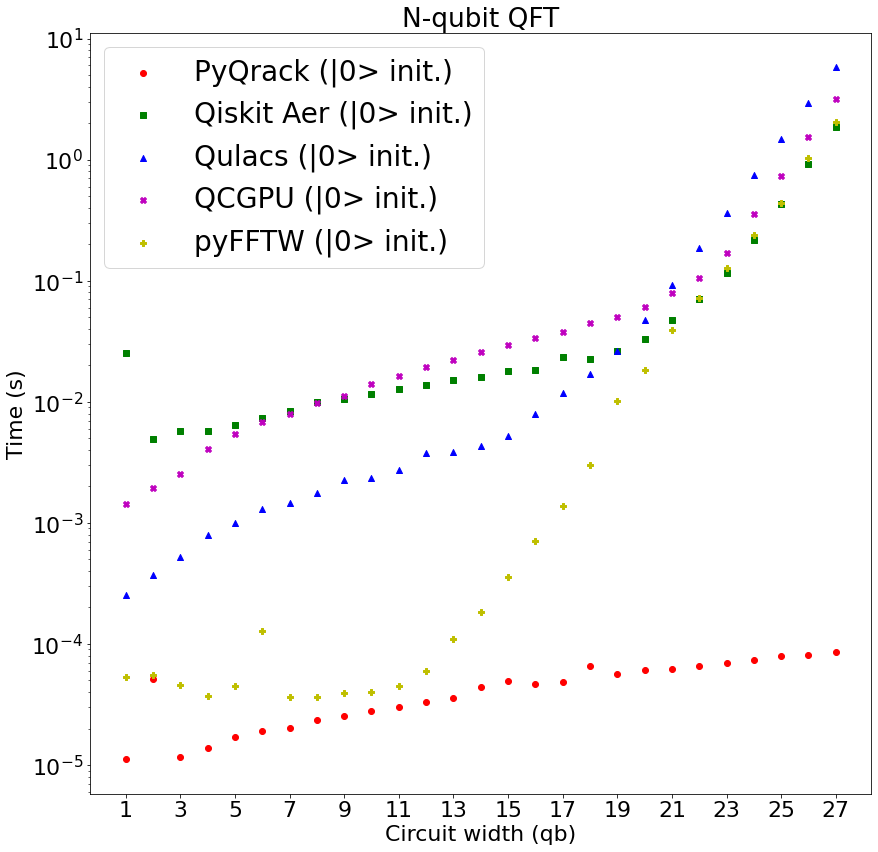

In [15]:
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.set_size_inches(14, 14)
plt.rc('legend',fontsize=28)
plt.rcParams.update({'font.size': 22})

colors = list("kcymbgr")
markers = list("*PX^so")

x = qrack_0_results.keys()
y = qrack_0_results.values()
plt.scatter(x,y,color=colors.pop(),marker=markers.pop())

x = aer_results.keys()
y = aer_results.values()
plt.scatter(x,y,color=colors.pop(),marker=markers.pop())

x = qulacs_results.keys()
y = qulacs_results.values()
plt.scatter(x,y,color=colors.pop(),marker=markers.pop())

x = qcgpu_results.keys()
y = qcgpu_results.values()
plt.scatter(x,y,color=colors.pop(),marker=markers.pop())

x = fftw_0_results.keys()
y = fftw_0_results.values()
plt.scatter(x,y,color=colors.pop(),marker=markers.pop())

plt.title("N-qubit QFT")
plt.xlabel("Circuit width (qb)")
plt.ylabel("Time (s)")
plt.legend(["PyQrack (|0> init.)", "Qiskit Aer (|0> init.)", "Qulacs (|0> init.)", "QCGPU (|0> init.)", "pyFFTW (|0> init.)"])
plt.yscale("log")
plt.xticks(np.arange(low, high + 1, step=2))

plt.show()

fig.savefig('qft_0_chart.png', dpi=100)

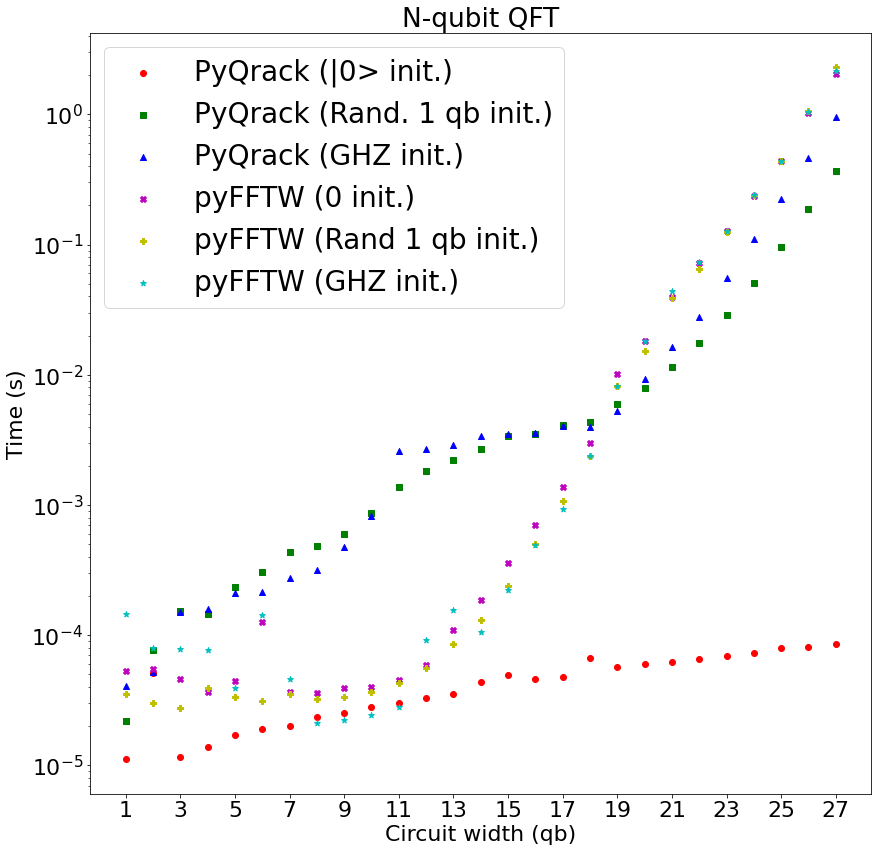

In [16]:
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.set_size_inches(14, 14)
plt.rc('legend',fontsize=28)
plt.rcParams.update({'font.size': 22})

colors = list("cymbgr")
markers = list("*PX^so")

x = qrack_0_results.keys()
y = qrack_0_results.values()
plt.scatter(x,y,color=colors.pop(),marker=markers.pop())

x = qrack_results.keys()
y = qrack_results.values()
plt.scatter(x,y,color=colors.pop(),marker=markers.pop())

x = qrack_k_results.keys()
y = qrack_k_results.values()
plt.scatter(x,y,color=colors.pop(),marker=markers.pop())

x = fftw_0_results.keys()
y = fftw_0_results.values()
plt.scatter(x,y,color=colors.pop(),marker=markers.pop())

x = fftw_results.keys()
y = fftw_results.values()
plt.scatter(x,y,color=colors.pop(),marker=markers.pop())

x = fftw_k_results.keys()
y = fftw_k_results.values()
plt.scatter(x,y,color=colors.pop(),marker=markers.pop())

plt.title("N-qubit QFT")
plt.xlabel("Circuit width (qb)")
plt.ylabel("Time (s)")
plt.legend(["PyQrack (|0> init.)", "PyQrack (Rand. 1 qb init.)", "PyQrack (GHZ init.)", "pyFFTW (0 init.)", "pyFFTW (Rand 1 qb init.)", "pyFFTW (GHZ init.)"])
plt.yscale("log")
plt.xticks(np.arange(low, high + 1, step=2))

plt.show()

fig.savefig('qft_ghz_chart.png', dpi=100)

In [17]:
import platform

print(platform.machine())
print(platform.version())
print(platform.platform())
print(platform.uname())
print(platform.system())
print(platform.processor())

x86_64
#33~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Mon Jan 30 17:03:34 UTC 2
Linux-5.19.0-32-generic-x86_64-with-glibc2.35
uname_result(system='Linux', node='sekhmet', release='5.19.0-32-generic', version='#33~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Mon Jan 30 17:03:34 UTC 2', machine='x86_64')
Linux
x86_64


In [18]:
import subprocess

line_as_bytes = subprocess.check_output("nvidia-smi -L", shell=True)
line = line_as_bytes.decode("ascii")
_, line = line.split(":", 1)
line, _ = line.split("(")
print(line.strip())

NVIDIA GeForce RTX 3080 Laptop GPU


In [19]:
import cpuinfo
cpuinfo.get_cpu_info()['brand_raw']

'Intel(R) Core(TM) i9-10980HK CPU @ 2.40GHz'